In [32]:
import keras
from keras import layers
import os
import numpy as np
from PIL import Image
from numpy import asarray
from tensorflow.keras.layers import UpSampling2D, BatchNormalization, Reshape

In [33]:
np.random.seed(seed=42)
dataset_train = '/home/ec2-user/SageMaker/style_64/train'
folders = os.listdir(dataset_train)
x_train = []
y_train = []
idx_train = []

for i in range(len(folders)):
    files = os.path.join(dataset_train,str(folders[i]))
    for j in range(len(os.listdir(files))):
        pth = os.path.join(files,os.listdir(files)[j])
        img = Image.open(pth)
        x_train.append(asarray(img))
        y_train.append(folders[i])
        idx_train.append(i)

In [34]:
y_train =np.array(y_train)
x_train =np.array(x_train)
idx_train = np.array(idx_train)

In [35]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(idx_train))
print(np.unique(y_train,return_counts=True))

(39753, 64, 64, 3)
(39753,)
(39753,)
(array(['Abstract_Expressionism', 'Baroque', 'Contemporary_Realism',
       'Cubism', 'Expressionism', 'Fauvism', 'High_Renaissance',
       'Impressionism', 'Minimalism', 'Naive_Art_Primitivism',
       'Pointillism', 'Pop_Art', 'Post_Impressionism', 'Realism'],
      dtype='<U22'), array([1993, 2967,  553, 1782, 4687,  653,  937, 9130, 2000, 1674,  359,
       1026, 4501, 7491]))


In [36]:
np.random.seed(seed=42)
dataset_test = '/home/ec2-user/SageMaker/style_64/test'
x_test = []
y_test = []
idx_test = []

for i in range(len(folders)):
    files = os.path.join(dataset_test,str(folders[i]))
    for j in range(len(os.listdir(files))):
        pth = os.path.join(files,os.listdir(files)[j])
        img = Image.open(pth)
        x_test.append(asarray(img))
        y_test.append(folders[i])
        idx_test.append(i)

In [37]:
y_test =np.array(y_test)
x_test =np.array(x_test)
idx_test = np.array(idx_test)

In [38]:
print(np.shape(x_test))
print(np.shape(y_test))
print(np.shape(idx_test))
print(np.unique(y_test,return_counts=True))

(8521, 64, 64, 3)
(8521,)
(8521,)
(array(['Abstract_Expressionism', 'Baroque', 'Contemporary_Realism',
       'Cubism', 'Expressionism', 'Fauvism', 'High_Renaissance',
       'Impressionism', 'Minimalism', 'Naive_Art_Primitivism',
       'Pointillism', 'Pop_Art', 'Post_Impressionism', 'Realism'],
      dtype='<U22'), array([ 427,  636,  119,  382, 1004,  140,  201, 1957,  429,  359,   77,
        220,  965, 1605]))


In [39]:
X_train = x_train
Y_train = y_train
X_test = x_test
Y_test = y_test

In [41]:
# np.save("X_train.npy",X_train)
# np.save("Y_train.npy",Y_train)
# np.save("X_test.npy",X_test)
# np.save("Y_test.npy",Y_test)

In [12]:
# x_train = X_train
# y_train = Y_train
# x_test = X_test
# y_test = Y_test

# This is a very basic encoder

In [ ]:
# x_train = np.array(x_train, dtype=np.float32)/ 255.
# x_test = np.array(x_test, dtype=np.float32)/ 255.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

In [ ]:
# This is the size of our encoded representations
encoding_dim = 100  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(64*64*3,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(64*64*3, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [ ]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
x_test[0]

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 14  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(64,64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64,64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 14  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(64,64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64,64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional AutoEncoder

# Other trial

In [42]:
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization
from keras.models import Model,Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(len(X_train),X_train.shape[1],X_train.shape[2],3)
X_test = X_test.reshape(len(X_test), X_test.shape[1],X_test.shape[2],3)
print(X_train.shape)
print(X_test.shape)

(39753, 64, 64, 3)
(8521, 64, 64, 3)


In [44]:
# import tensorflow.keras

In [47]:
input_img = Input(shape=(64,64,3))

#Encoder
x = Conv2D(16,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same', name='encoder')(x)


# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [48]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(64,64, 3)))
model.add(BatchNormalization())     # 32x32x32
model.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'))      # 16x16x32
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 16x16x32
model.add(BatchNormalization())     # 16x16x32
model.add(UpSampling2D())
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 32x32x32
model.add(BatchNormalization())
model.add(Conv2D(3,  kernel_size=1, strides=1, padding='same', activation='sigmoid'))   # 32x32x3

model.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
up_sampling2d_8 (UpSampling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 32)        9248      
__________

In [16]:
autoencoder= Model(input_img, decoded)

In [17]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 8)         584       
_________________________________________________________________
encoder (MaxPooling2D)       (None, 8, 8, 8)           0         
__________

In [18]:
encoder = Model(input_img, encoded)

In [19]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 8)         584       
_________________________________________________________________
encoder (MaxPooling2D)       (None, 8, 8, 8)           0         
Total para

In [20]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
model.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))



Train on 39753 samples, validate on 8521 samples
Epoch 1/10
39753/39753 [==============================] - 22s 547us/step - loss: 0.0127 - acc: 0.6785 - val_loss: 0.0089 - val_acc: 0.7019
Epoch 2/10
39753/39753 [==============================] - 17s 436us/step - loss: 0.0043 - acc: 0.8171 - val_loss: 0.0091 - val_acc: 0.6580
Epoch 3/10
39753/39753 [==============================] - 17s 437us/step - loss: 0.0032 - acc: 0.8451 - val_loss: 0.0068 - val_acc: 0.7980
Epoch 4/10
39753/39753 [==============================] - 17s 440us/step - loss: 0.0027 - acc: 0.8592 - val_loss: 0.0052 - val_acc: 0.8416
Epoch 5/10
39753/39753 [==============================] - 18s 443us/step - loss: 0.0023 - acc: 0.8692 - val_loss: 0.0029 - val_acc: 0.8472
Epoch 6/10
39753/39753 [==============================] - 18s 444us/step - loss: 0.0021 - acc: 0.8758 - val_loss: 0.0024 - val_acc: 0.8233
Epoch 7/10
39753/39753 [==============================] - 18s 446us/step - loss: 0.0020 - acc: 0.8800 - val_loss: 0

In [22]:
#encoded_imgs = model.predict(X_test)
predicted = model.predict(X_test)

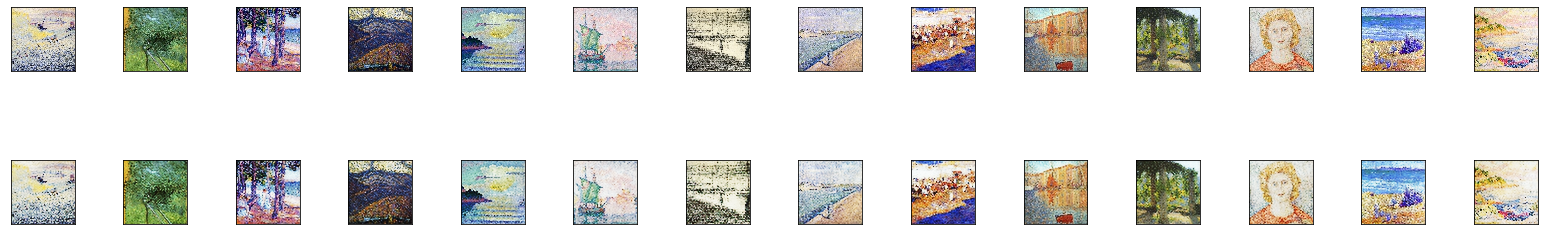

In [23]:
plt.figure(figsize=(40,4))
for i in range(14):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(64,64,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(64,64,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

In [24]:
# model.save('autoencoder.h5')

In [25]:
encoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 39753 samples, validate on 8521 samples
Epoch 1/10
39753/39753 [==============================] - 20s 501us/step - loss: 0.0017 - acc: 0.8881 - val_loss: 0.0017 - val_acc: 0.8676
Epoch 2/10
39753/39753 [==============================] - 20s 497us/step - loss: 0.0016 - acc: 0.8901 - val_loss: 0.0017 - val_acc: 0.8498
Epoch 3/10
39753/39753 [==============================] - 20s 498us/step - loss: 0.0016 - acc: 0.8919 - val_loss: 0.0018 - val_acc: 0.8286
Epoch 4/10
39753/39753 [==============================] - 20s 500us/step - loss: 0.0015 - acc: 0.8931 - val_loss: 0.0019 - val_acc: 0.8312
Epoch 5/10
39753/39753 [==============================] - 20s 500us/step - loss: 0.0015 - acc: 0.8944 - val_loss: 0.0014 - val_acc: 0.8926
Epoch 6/10
39753/39753 [==============================] - 20s 501us/step - loss: 0.0014 - acc: 0.8950 - val_loss: 0.0016 - val_acc: 0.8574
Epoch 7/10
39753/39753 [==============================] - 20s 503us/step - loss: 0.0014 - acc: 0.8975 - val_loss: 0.0

In [27]:
c = encoder.predict(X_test)

In [28]:
np.save("c.npy", c)

In [29]:
np.save("y.npy",y_test)

In [30]:
np.save("idx.npy",idx_test)

In [31]:
np.save("x.npy",x_test)

# Variational AutoEncoder

In [ ]:
original_dim = 64*64*3
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [ ]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [ ]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [ ]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [ ]:
(x_train, y_train) = (x_train, y_train)
(x_test, y_test) = (x_test, y_test)
# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))